# Programming Assignment
## Student number 202017551


It is considered good practice to download all the modules to be used at the top of the notebook, which is what will be done first.

In [1]:
import csv
import json
import numpy as np
import pandas as pd
import seaborn as sns

## Data Processing

### Task 1, 2 and 3

- Firstly, the `enumerate` keyword will be used to pull out the headers to provide a first glance of the data set to be manipulated. This will also be used to print the headers and their respective indicies.
- Following that, the indices of each header will be pulled out in order to create the nested structure required.
- The values will be cast to appropriate types while the data manipulation is taking place
- The empty strings in the `Dependants column` will be found and fixed while in the loop by using conditionals and replacing them with something meaningful (zero) while the file is still open.
- Added another empty list which will be populated with the indicies of the rows with errors. This will then be printed out after the file is closed

In [2]:
#pulling out the headers and assigning them to a variable

with open("./acw_user_data.csv", mode = "r") as my_file:
    csv_reader = csv.reader(my_file)
    for index, line in enumerate(csv_reader):
        if index == 0:
            headers = line

In [3]:
#print out the headers just to have a first glance

print(headers)

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (£)', 'Retired', 'Yearly Salary (£)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']


In [4]:
for index, line in enumerate(headers):
    print(index, line)

0 Address Street
1 Address City
2 Address Postcode
3 Age (Years)
4 Distance Commuted to Work (miles)
5 Employer Company
6 Credit Card Start Date
7 Credit Card Expiry Date
8 Credit Card Number
9 Credit Card CVV
10 Dependants
11 First Name
12 Bank IBAN
13 Last Name
14 Marital Status
15 Yearly Pension (£)
16 Retired
17 Yearly Salary (£)
18 Sex
19 Vehicle Make
20 Vehicle Model
21 Vehicle Year
22 Vehicle Type


**The above makes is easier to see which lines will be required to build the nested structure**
- For example, for the nested Address dictionary, lines [0:3] will be required.
- For example, for the nested Vehicle dictionary, lines [19:23] will be required and so forth.

In [5]:
with open("./acw_user_data.csv", mode = "r") as my_file:
    reader = csv.reader(my_file)
    
    all_customers = [] #list to hold each customer dictionary
    problematic_rows = [] #list to hold the problematic rows in dependants column
    
    for index, line in enumerate(reader):
        customer_data = {}
        
        #skipping headers as not required
        if index == 0:
            continue
        
        #if there is an empty string in "dependants" column, amend it to zero and add the indicies to the list
        if line[10] == "" or line[10] == " ": 
            line[10] = "0"
            problematic_rows.append(index)
            
        customer_data["First Name"] = line[11]
        customer_data["Last Name"] = line[13]
        customer_data["Age (Years)"] = int(line[3])
        customer_data["Sex"] = line[18]
        customer_data["Retired"] = line[16] == "True"
        customer_data["Marital Status"] = line[14]
        customer_data["Dependants"] = int(line[10])
        customer_data["Yearly Salary (£)"] = float(line[17])
        customer_data["Yearly Pension (£)"] = float(line[15])
        customer_data["Employer Company"] = line[5]
        customer_data["Distance Commuted to Work (miles)"] = float(line[4])
        
        #separating out the data so it is easier to distinguish between nested and none nested data(above)
        customer_data["Address"] = {"street":line[0],
                                    "city": line[1],
                                    "postcode": line[2]}
        customer_data['Vehicle'] = {"make":line[19],
                                    "model": line[20],
                                    "year": line[21],
                                    "type": line[22]}
        customer_data["Credit_Card"] = {"start_date": line[6],
                                        "expiry_date": line[7],
                                        "number": int(line[8]),
                                        "cvv": int(line[9]),
                                        "bank_iban": line[12]}

        all_customers.append(customer_data)
        
    #print(all_customers)
    #print(problematic_rows)
    print(f"Errors in Dependants column in rows: {problematic_rows}")

Errors in Dependants column in rows: [22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


### Task 4
- Created a function to write files to json as several will need to be created.
- Write data to JSON using `write_to_json` list created in from Task 2.
- Will then read the newly created JSON file (processed.json) and undertake an equality test to ensure the data written and read in are the same.

In [6]:
def write_to_json(filename, list_of_dicts):
    """Write files to JSON data format."""
    with open(filename, mode = "w") as file:
        json.dump(list_of_dicts, file)

In [7]:
#tested the function

#write_to_json("./test.json", retired)

In [8]:
write_to_json("./processed.json", all_customers)

In [9]:
#reading file back in to check whether writing was successful
#only printing the first row

with open("./processed.json", mode = "r") as file:
    customers = json.load(file)
    for row in customers:
        print(row, "\n")
        break

if customers == all_customers:
    print("Same")

{'First Name': 'Kieran', 'Last Name': 'Wilson', 'Age (Years)': 89, 'Sex': 'Male', 'Retired': True, 'Marital Status': 'married or civil partner', 'Dependants': 3, 'Yearly Salary (£)': 72838.0, 'Yearly Pension (£)': 7257.0, 'Employer Company': 'N/A', 'Distance Commuted to Work (miles)': 0.0, 'Address': {'street': '70 Lydia isle', 'city': 'Lake Conor', 'postcode': 'S71 7XZ'}, 'Vehicle': {'make': 'Hyundai', 'model': 'Bonneville', 'year': '2009', 'type': 'Pickup'}, 'Credit_Card': {'start_date': '08/18', 'expiry_date': '11/27', 'number': 676373692463, 'cvv': 875, 'bank_iban': 'GB62PQKB71416034141571'}} 

Same


### Task 5

**Retired**

- The `Retired` column contains a boolean so will filter those that are retired by using a conditional and adding them to a separate list.
- If `True` then these rows will be added to the list.
- The list will then be used to write data to `retired.json`

In [10]:
retired = [row for row in customers if row["Retired"] == True]
#print(retired)

In [11]:
write_to_json("./retired.json", retired)

**Employed**

- Using a list comprehension to filter those that are employed.
- If there is an employer name, it will be assumed that they are employed so filtering out the 'N/A's.
- The list will then be used to write data to `employed.json`.

In [12]:
employed = [row for row in customers if row["Employer Company"] != "N/A"]
#print(employed)

In [13]:
write_to_json("./employed.json", employed)

### Task 6

- Firstly, will breakdown the nested Credit_Card structure to obtain the start and expiry dates of credit cards separately by splitting them in order to undertake calculations.
- Instead of having multiple conditionals to check for the year and the months remaining, decided to convert the years to months to make calculations easier and lessons the error rate.
- The function returns a boolean which can then be used to write the relevant rows to the required JSON file
- Will then add the relevant rows to a list and dump to JSON

In [14]:
#printing the first customer to check the key, value pairs and their location within the dictionary
for customer in customers:
    print(customer)
    break

{'First Name': 'Kieran', 'Last Name': 'Wilson', 'Age (Years)': 89, 'Sex': 'Male', 'Retired': True, 'Marital Status': 'married or civil partner', 'Dependants': 3, 'Yearly Salary (£)': 72838.0, 'Yearly Pension (£)': 7257.0, 'Employer Company': 'N/A', 'Distance Commuted to Work (miles)': 0.0, 'Address': {'street': '70 Lydia isle', 'city': 'Lake Conor', 'postcode': 'S71 7XZ'}, 'Vehicle': {'make': 'Hyundai', 'model': 'Bonneville', 'year': '2009', 'type': 'Pickup'}, 'Credit_Card': {'start_date': '08/18', 'expiry_date': '11/27', 'number': 676373692463, 'cvv': 875, 'bank_iban': 'GB62PQKB71416034141571'}}


In [15]:
def flag_expired_card(row):
    #returns a boolean depending on whether the difference between credit card start and expiry date is more than 10 years
    
    breakdown_start_date = row["Credit_Card"]["start_date"]
    breakdown_start_date = breakdown_start_date.split("/") #using the "/" as that's the separator between month and year
    mm_start = int(breakdown_start_date[0]) #index 0 is the start month, this will be the same for expiry month
    yyyy_start = int(breakdown_start_date[1]) #index 1 is the start year, this will be the same for expiry year

    breakdown_end_date = row["Credit_Card"]["expiry_date"]
    breakdown_end_date = breakdown_end_date.split("/") 
    mm_end = int(breakdown_end_date[0])
    yyyy_end = int(breakdown_end_date[1])

    #converting year to months and to also add months in the date
    total_month_start = (yyyy_start * 12) + mm_start 
    total_month_end = (yyyy_end * 12) + mm_end

    # if the total months difference between start and expiry dates > (10 years converted to months)
    if total_month_end - total_month_start > (10 * 12):
        return True
    else:
        return False

In [16]:
#creating a list to hold the rows that fit the criteria to then be used to write to JSON
#using the above function to write the relevant rows to the above list

remove_ccard = [row for row in customers if flag_expired_card(row) == True]
#print(remove_ccard)

In [17]:
write_to_json("./remove_ccard.json", remove_ccard)

### Task 7
- The initial idea was to do a list comprehension for the new attribute and adding a conditional and only using salary if distance <= 1
- Then realised this would not be efficient as still needed to add new attribute to customers data
- Used the same logic but then also added new attribute in the same code 
- Salary commuted => yearly salary / distance commuted
- As values were already cast in Task 2, this was not neccesary
- Rounding to 2 decimal places as this looks neater and easier to read when combined with the rest of the data
- Following calculations, will create a function to enable the dictionaries to be sorted by the new salary commute attribute
- Once sorted, output file will be written to JSON

In [18]:
for customer in customers:
    if customer["Distance Commuted to Work (miles)"] <= 1:
        salary_commute = customer["Yearly Salary (£)"]
    else:
        salary_commute = customer["Yearly Salary (£)"] / customer["Distance Commuted to Work (miles)"]
    
    customer["Salary_Commute"] = round(salary_commute,2)
    
#checking to see if attribute added correctly
#print(customers)

In [19]:
#function created to be used to sort the salary commute attribute

def sort_customers(customer):
    """Sort customer data by salary_commute attribute."""
    return customer["Salary_Commute"]

In [20]:
#Assigning a variable to the sorted data which will then be used when writing to JSON

commute = sorted(customers, key = sort_customers)
#print(commute)

In [21]:
write_to_json("./commute.json", commute)

## Data Visualisation

### Task 1

In [22]:
#reading in original data using Pandas

customers_df = pd.read_csv("./acw_user_data.csv")
customers_df.head()

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (£),Retired,Yearly Salary (£),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV


In [23]:
#print out names of all columns for easy reference

customers_df.columns

Index(['Address Street', 'Address City', 'Address Postcode', 'Age (Years)',
       'Distance Commuted to Work (miles)', 'Employer Company',
       'Credit Card Start Date', 'Credit Card Expiry Date',
       'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name',
       'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (£)',
       'Retired', 'Yearly Salary (£)', 'Sex', 'Vehicle Make', 'Vehicle Model',
       'Vehicle Year', 'Vehicle Type'],
      dtype='object')

In [24]:
#Creating data series for salary and age and assigning them to variables to add to f string for easier readability

salary = customers_df["Yearly Salary (£)"]
age = customers_df["Age (Years)"]

### 1 (a). Calculating mean salary

In [25]:
print(f"The yearly mean salary: £{salary.mean()}")

The yearly mean salary: £57814.078


### 1 (b). Calculating meadian age

In [26]:
#Casting the age to an integer

print(f"The median age: {int(age.median())}")

The median age: 54


## Task 2

### 2 (a). Univariate plot for Age with binwidth 5

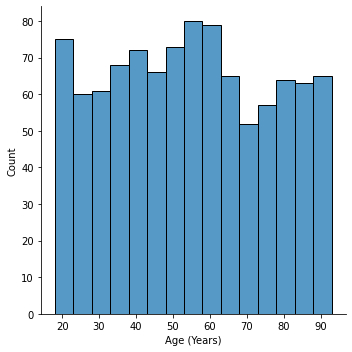

In [27]:
%matplotlib inline
age_uni_plot = sns.displot(data = customers_df, x = "Age (Years)", binwidth = 5)

### 2 (b). Univariate plot for Dependants

In [28]:
#Find whether any null entries exist in the data and how many

customers_df.isnull().sum()

Address Street                         0
Address City                           0
Address Postcode                       0
Age (Years)                            0
Distance Commuted to Work (miles)      0
Employer Company                     246
Credit Card Start Date                 0
Credit Card Expiry Date                0
Credit Card Number                     0
Credit Card CVV                        0
Dependants                            19
First Name                             0
Bank IBAN                              0
Last Name                              0
Marital Status                         0
Yearly Pension (£)                     0
Retired                                0
Yearly Salary (£)                      0
Sex                                    0
Vehicle Make                           0
Vehicle Model                          0
Vehicle Year                           0
Vehicle Type                           0
dtype: int64

In [29]:
#Checking to see which values in dependants column are not unique

customers_df['Dependants'].unique()

array([ 3.,  1.,  2.,  4., nan,  5.])

In [30]:
#finding out type of data in each column so can fill with correct data type

print(customers_df.dtypes)

Address Street                        object
Address City                          object
Address Postcode                      object
Age (Years)                            int64
Distance Commuted to Work (miles)    float64
Employer Company                      object
Credit Card Start Date                object
Credit Card Expiry Date               object
Credit Card Number                     int64
Credit Card CVV                        int64
Dependants                           float64
First Name                            object
Bank IBAN                             object
Last Name                             object
Marital Status                        object
Yearly Pension (£)                     int64
Retired                                 bool
Yearly Salary (£)                      int64
Sex                                   object
Vehicle Make                          object
Vehicle Model                         object
Vehicle Year                           int64
Vehicle Ty

In [31]:
#Using .fillna() to do a temporary fix in nan entries in order to create plot

customers_df['Dependants'].fillna(value = 0 , inplace = True)

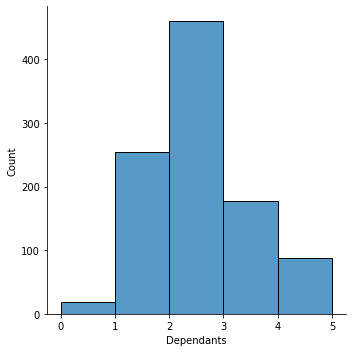

In [32]:
#Creating a plot now that errors have been patched

%matplotlib inline
d_plot = sns.displot(data = customers_df, x = "Dependants", bins = 5)

### 2 (c). Univariate plot for Age (default bins) conditioned on Marital Status

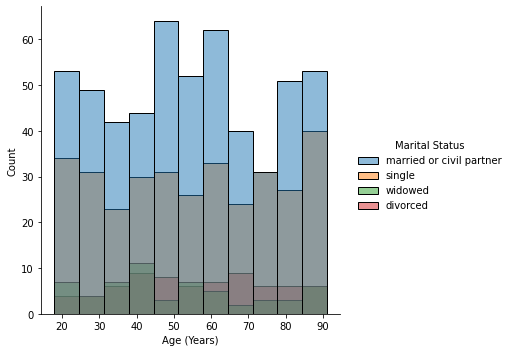

In [33]:
%matplotlib inline
age_marital_plot = sns.displot(data = customers_df, x ="Age (Years)", hue = "Marital Status")

## Task 3

### 3 (a).

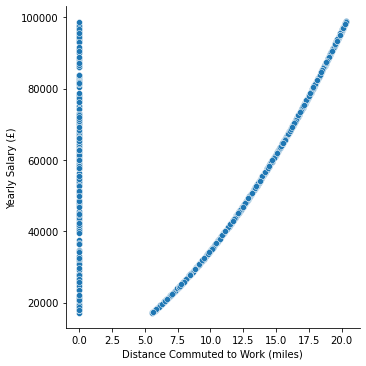

In [34]:
%matplotlib inline
distance_salary_plot = sns.relplot(data = customers_df, x = 'Distance Commuted to Work (miles)', y = 'Yearly Salary (£)')

### 3 (b).

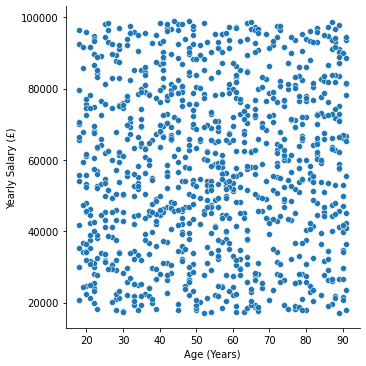

In [35]:
%matplotlib inline
age_salary_plot = sns.relplot(data = customers_df, x = 'Age (Years)', y = 'Yearly Salary (£)')

### 3 (c).

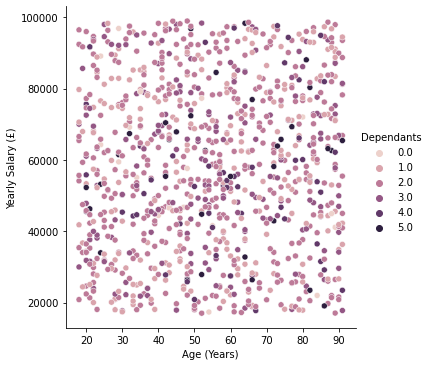

In [36]:
%matplotlib inline
age_multi_plot = sns.relplot(data = customers_df, x = 'Age (Years)', y = 'Yearly Salary (£)', hue = 'Dependants')

## Task 4

In [37]:
#creating dictionary to store the keys as filename and values as plot variables assigned to each individual figure
#this will then be used to save each figure by passing the filename as tke key

plots_saved = {}
plots_saved["./age_univariate.png"] = age_uni_plot
plots_saved["./dependants.png"] = d_plot
plots_saved["./age_marital.png"] = age_marital_plot
plots_saved["./distance_salary.png"] = distance_salary_plot
plots_saved["./age_salary.png"] = age_salary_plot
plots_saved["./age_multivariate.png"] = age_multi_plot

In [38]:
for key ,value in plots_saved.items():
    value.savefig(key)
    print(key)

./age_univariate.png
./dependants.png
./age_marital.png
./distance_salary.png
./age_salary.png
./age_multivariate.png
